In [ ]:
#Levy Thiga Kariuki
import pandas as pd
import nltk
nltk.download('stopwords')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import pickle
import seaborn as sns




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Load the dataset
df = pd.read_csv('IMDB Dataset.csv')


In [ ]:
# Text cleaning and preprocessing
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    return text


df['review'] = df['review'].apply(clean_text)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)


In [ ]:
# Create a pipeline for text classification with CountVectorizer and Multinomial Naive Bayes
text_clf = Pipeline([
    ('vect', CountVectorizer(stop_words=stopwords.words('english') + list(ENGLISH_STOP_WORDS))),
    ('clf', MultinomialNB()),
])


In [ ]:
# Define hyperparameters for grid search (in this case, there are fewer hyperparameters to tune)
param_grid = {
    'vect__ngram_range': [(1, 1), (1, 2)],  # Unigrams or bigrams
    'clf__alpha': [0.1, 1, 10],  # Additive smoothing parameter
}


In [ ]:
# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(text_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        CountVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                                    'your',
                                                                    'yours',
                                                                    'yourself',
                                                                    'yourselves',
                                                                    'he', 'him',
                                                                    'his',
                                                                    'himself',
                                                                    'she',
                                                                    "she's",
                                                                    'her',
                                                                    'hers',
                                                                    'herself',
                                                                    'it',
                                                                    "it's",
                                                                    'its',
                                                                    'itself', ...])),
                                       ('clf', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'clf__alpha': [0.1, 1, 10],
                         'vect__ngram_range': [(1, 1), (1, 2)]},
             scoring='accuracy')

In [ ]:
# Print the best hyperparameters from the grid search
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'clf__alpha': 1, 'vect__ngram_range': (1, 2)}


In [ ]:
# Evaluate the performance on the test set
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.8796


In [ ]:
# Display classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.87      0.89      0.88      4961
    positive       0.89      0.87      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



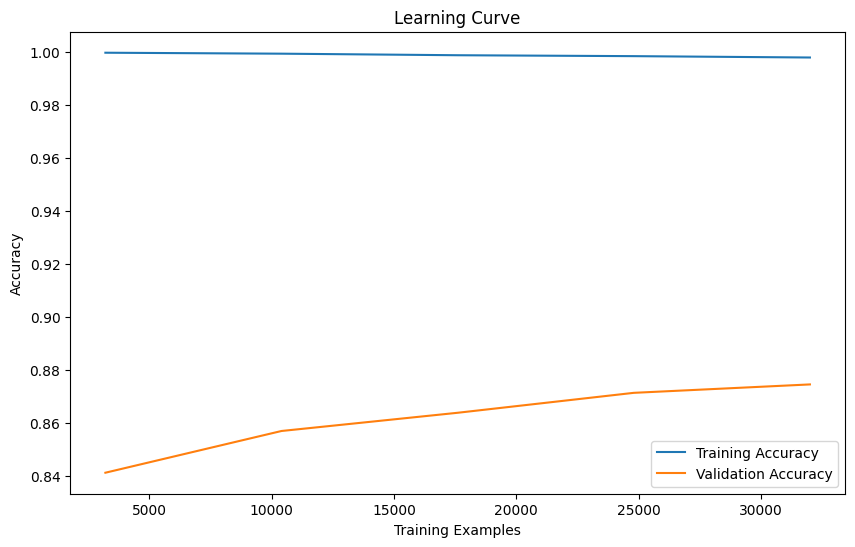

In [ ]:
# Plot learning curve
train_sizes, train_scores, test_scores = learning_curve(grid_search.best_estimator_, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)


plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Accuracy')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Accuracy')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
